<h1 align ='center'>10.2 Data Aggregation

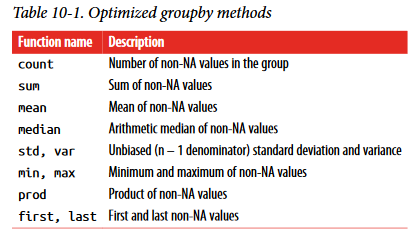

In [3]:
import pandas as pd
import numpy as np

df = pd.DataFrame({'key1' : ['a', 'a', 'b', 'b', 'a'],
                   'key2' : ['one', 'two', 'one', 'two', 'one'],
                   'data1' : np.random.randn(5),
                   'data2' : np.random.randn(5)})
df

,key1,key2,data1,data2
0,a,one,0.494407,-0.413632
1,a,two,0.790521,0.947730
2,b,one,0.296631,0.764754
3,b,two,-0.221458,0.577065
4,a,one,-1.224224,-1.659703


In [4]:
grouped = df.groupby('key1')

quantile computes sample quantiles of a Series or a DataFrame’s columns.

In [5]:
grouped['data1'].quantile(0.9)

key1
a    0.731298
b    0.244822
Name: data1, dtype: float64

To use your own aggregation functions, pass any function that aggregates an array tothe aggregate or agg method

In [6]:
def peak_to_peak(arr):
    return arr.max() - arr.min()

In [7]:
grouped.agg(peak_to_peak)

,data1,data2
key1,,
a,2.014744,2.607434
b,0.518088,0.187689


In [8]:
grouped.describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.020235  1.087855 -1.224224 -0.364908  0.494407  0.642464   
b      2.0  0.037586  0.366344 -0.221458 -0.091936  0.037586  0.167108   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     0.790521   3.0 -0.375202  1.304142 -1.659703 -1.036668 -0.413632   
b     0.296631   2.0  0.670910  0.132716  0.577065  0.623987  0.670910   

                          
           75%       max  
key1                      
a     0.267049  0.947730  
b     0.717832  0.764754

<h3>Column-Wise and Multiple Function Application

In [9]:
tips = pd.read_csv(r'D:\tips.csv')

In [10]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']

In [12]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


aggregating a Series or all of the columns of a DataFrame is amatter of using aggregate with the desired function or calling a method like mean orstd. 

However, you may want to aggregate using a different function depending on thecolumn,  or  multiple  functions  at  once. 

In [13]:
grouped = tips.groupby(['day', 'smoker'])

In [14]:
grouped_pct = grouped['tip_pct']

In [15]:
grouped_pct.agg('mean')

day   smoker
Fri   No        0.151650
      Yes       0.174783
Sat   No        0.158048
      Yes       0.147906
Sun   No        0.160113
      Yes       0.187250
Thur  No        0.160298
      Yes       0.163863
Name: tip_pct, dtype: float64

In [16]:
grouped_pct.agg(['mean', 'std', peak_to_peak])

mean       std  peak_to_peak
day  smoker                                  
Fri  No      0.151650  0.028123      0.067349
     Yes     0.174783  0.051293      0.159925
Sat  No      0.158048  0.039767      0.235193
     Yes     0.147906  0.061375      0.290095
Sun  No      0.160113  0.042347      0.193226
     Yes     0.187250  0.154134      0.644685
Thur No      0.160298  0.038774      0.193350
     Yes     0.163863  0.039389      0.151240

You  don’t  need  to  accept  the  names  that  GroupBy  gives  to  the  columns;  notably,lambda  functions  have  the  name  '<lambda>',  which  makes  them  hard  to  identify(you  can  see  for  yourself  by  looking  at  a  function’s  __name__  attribute).  Thus,  if  youpass a list of (name, function) tuples, the first element of each tuple will be used asthe  DataFrame  column  names  

In [17]:
grouped_pct.agg([('foo', 'mean'), ('bar', np.std)])

foo       bar
day  smoker                    
Fri  No      0.151650  0.028123
     Yes     0.174783  0.051293
Sat  No      0.158048  0.039767
     Yes     0.147906  0.061375
Sun  No      0.160113  0.042347
     Yes     0.187250  0.154134
Thur No      0.160298  0.038774
     Yes     0.163863  0.039389

In [20]:
functions = ['count', 'mean', 'max']

In [22]:
result = grouped[['tip_pct', 'total_bill']].agg(functions)

In [23]:
result

tip_pct                     total_bill                  
              count      mean       max      count       mean    max
day  smoker                                                         
Fri  No           4  0.151650  0.187735          4  18.420000  22.75
     Yes         15  0.174783  0.263480         15  16.813333  40.17
Sat  No          45  0.158048  0.291990         45  19.661778  48.33
     Yes         42  0.147906  0.325733         42  21.276667  50.81
Sun  No          57  0.160113  0.252672         57  20.506667  48.17
     Yes         19  0.187250  0.710345         19  24.120000  45.35
Thur No          45  0.160298  0.266312         45  17.113111  41.19
     Yes         17  0.163863  0.241255         17  19.190588  43.11

As  you  can  see,  the  resulting  DataFrame  has  hierarchical  columns,  the  same  as  youwould  get  aggregating  each  column  separately  and  using  concat  to  glue  the  resultstogether using the column names as the keys argument

In [25]:
result['tip_pct']

count      mean       max
day  smoker                           
Fri  No          4  0.151650  0.187735
     Yes        15  0.174783  0.263480
Sat  No         45  0.158048  0.291990
     Yes        42  0.147906  0.325733
Sun  No         57  0.160113  0.252672
     Yes        19  0.187250  0.710345
Thur No         45  0.160298  0.266312
     Yes        17  0.163863  0.241255

In [27]:
ftuples = [('Durchschnitt', 'mean'), ('Abweichung', np.var)]
grouped[['tip_pct', 'total_bill']].agg(ftuples)

tip_pct              total_bill            
            Durchschnitt Abweichung Durchschnitt  Abweichung
day  smoker                                                 
Fri  No         0.151650   0.000791    18.420000   25.596333
     Yes        0.174783   0.002631    16.813333   82.562438
Sat  No         0.158048   0.001581    19.661778   79.908965
     Yes        0.147906   0.003767    21.276667  101.387535
Sun  No         0.160113   0.001793    20.506667   66.099980
     Yes        0.187250   0.023757    24.120000  109.046044
Thur No         0.160298   0.001503    17.113111   59.625081
     Yes        0.163863   0.001551    19.190588   69.808518

Now,  suppose  you  wanted  to  apply  potentially  different  functions  to  one  or  more  ofthe columns. To do this, pass a dict to agg that contains a mapping of column namesto any of the function specifications listed so far

In [29]:
grouped.agg({'tip' : np.max, 'size' : 'sum'})

tip  size
day  smoker             
Fri  No       3.50     9
     Yes      4.73    31
Sat  No       9.00   115
     Yes     10.00   104
Sun  No       6.00   167
     Yes      6.50    49
Thur No       6.70   112
     Yes      5.00    40

In [30]:
grouped.agg({'tip_pct' : ['min', 'max', 'mean', 'std'],
             'size' : 'sum'})

tip_pct                               size
                  min       max      mean       std  sum
day  smoker                                             
Fri  No      0.120385  0.187735  0.151650  0.028123    9
     Yes     0.103555  0.263480  0.174783  0.051293   31
Sat  No      0.056797  0.291990  0.158048  0.039767  115
     Yes     0.035638  0.325733  0.147906  0.061375  104
Sun  No      0.059447  0.252672  0.160113  0.042347  167
     Yes     0.065660  0.710345  0.187250  0.154134   49
Thur No      0.072961  0.266312  0.160298  0.038774  112
     Yes     0.090014  0.241255  0.163863  0.039389   40

<h3>Returning Aggregated Data Without Row Indexes

In  all  of  the  examples  up  until  now,  the  aggregated  data  comes  back  with  an  index,potentially  hierarchical,  composed  from  the  unique  group  key  combinations.  Sincethis  isn’t  always  desirable,  you  can  disable  this  behavior  in  most  cases  by  passingas_index=False to groupby

In [32]:
tips.groupby(['day', 'smoker'], as_index=False).mean()

,day,smoker,total_bill,tip,size,tip_pct
0,Fri,No,18.420000,2.812500,2.250000,0.151650
1,Fri,Yes,16.813333,2.714000,2.066667,0.174783
2,Sat,No,19.661778,3.102889,2.555556,0.158048
3,Sat,Yes,21.276667,2.875476,2.476190,0.147906
4,Sun,No,20.506667,3.167895,2.929825,0.160113
5,Sun,Yes,24.120000,3.516842,2.578947,0.187250
6,Thur,No,17.113111,2.673778,2.488889,0.160298
7,Thur,Yes,19.190588,3.030000,2.352941,0.163863


Of   course,   it’s   always   possible   to   obtain   the   result   in   this   format   by   callingreset_index on the result. Using the as_index=False method avoids some unneces‐sary computations.